Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


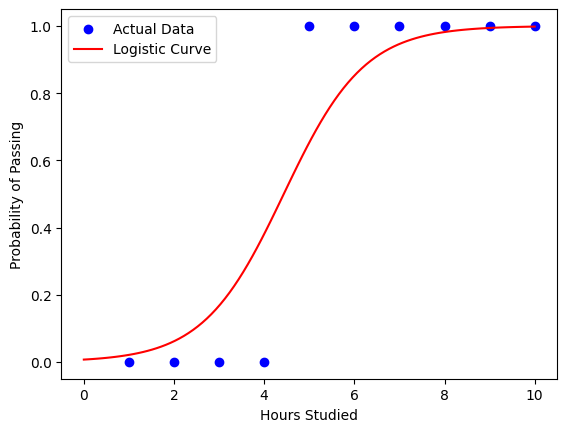

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Sample Data: Hours Studied vs. Pass/Fail
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)

# Splitting Data into Training and Testing Sets
X = df[['Hours_Studied']]  # Feature
y = df['Pass']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualizing the Sigmoid Curve
x_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(x_range, y_prob, color='red', label='Logistic Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.legend()
plt.show()


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Creating the dataset as a dictionary
data = {
    "CustomerID": [12345, 12346, 12347, 12348, 12349, 12350],
    "Age": [32, 45, 28, 35, 40, 22],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
    "MonthlySpend": [100, 70, 50, 120, 80, 60],
    "ContractType": ["Month-to-Month", "Annual", "Month-to-Month", "Annual", "Month-to-Month", "Annual"],
    "Tenure": [12, 24, 6, 36, 8, 15],
    "CustomerSupportCalls": [5, 1, 3, 0, 4, 2],
    "PaymentMethod": ["Credit Card", "Bank Transfer", "PayPal", "Credit Card", "PayPal", "Bank Transfer"],
    "Churn": [1, 0, 1, 0, 1, 0]  # Target variable: 1 = Churned, 0 = Not Churned
}

# Converting the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
df

,CustomerID,Age,Gender,MonthlySpend,ContractType,Tenure,CustomerSupportCalls,PaymentMethod,Churn
0,12345,32,Male,100,Month-to-Month,12,5,Credit Card,1
1,12346,45,Female,70,Annual,24,1,Bank Transfer,0
2,12347,28,Male,50,Month-to-Month,6,3,PayPal,1
3,12348,35,Female,120,Annual,36,0,Credit Card,0
4,12349,40,Male,80,Month-to-Month,8,4,PayPal,1
5,12350,22,Female,60,Annual,15,2,Bank Transfer,0


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# drop unnecessary columns
df_new0 = df.drop(columns=["CustomerID","PaymentMethod"])

# get dummies for ContractType column
df_new0 = pd.get_dummies(df_new0, columns=["ContractType", "Gender"], drop_first=True)

# display
print(df_new0)

   Age  MonthlySpend  Tenure  CustomerSupportCalls  Churn  \
0   32           100      12                     5      1   
1   45            70      24                     1      0   
2   28            50       6                     3      1   
3   35           120      36                     0      0   
4   40            80       8                     4      1   
5   22            60      15                     2      0   

   ContractType_Month-to-Month  Gender_Male  
0                         True         True  
1                        False        False  
2                         True         True  
3                        False        False  
4                         True         True  
5                        False        False  


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instantiate the model
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)

# make predictions
y_pred = logreg.predict(X_test)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.14657127 0.80413567]


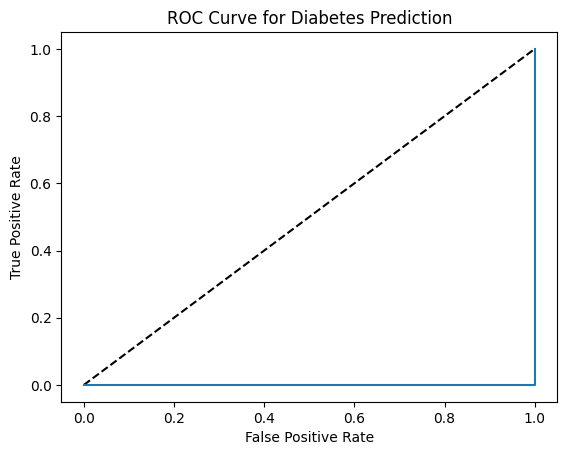

In [77]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [79]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.0
[[0 1]
 [1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

